In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define autoencoder architecture
input_shape = (28, 28)
hidden_units = 64

In [3]:


# Encoder
encoder_inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Flatten()(encoder_inputs)
x = tf.keras.layers.Dense(hidden_units, activation='relu')(x)
encoder_outputs = tf.keras.layers.Dense(hidden_units, activation='relu')(x)

# Decoder
decoder_inputs = tf.keras.layers.Dense(hidden_units, activation='relu')(encoder_outputs)
x = tf.keras.layers.Dense(np.prod(input_shape), activation='sigmoid')(decoder_inputs)
decoder_outputs = tf.keras.layers.Reshape(input_shape)(x)

 


Epoch 1/10
469/469 [==============================] - 9s 14ms/step - loss: 0.2028 - val_loss: 0.1378
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1265 - val_loss: 0.1157
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1116 - val_loss: 0.1051
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1039 - val_loss: 0.1000
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0993 - val_loss: 0.0959
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0959 - val_loss: 0.0932
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0934 - val_loss: 0.0914
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0918 - val_loss: 0.0900
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0904 - val_loss: 0.0887
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0891 - val_loss: 

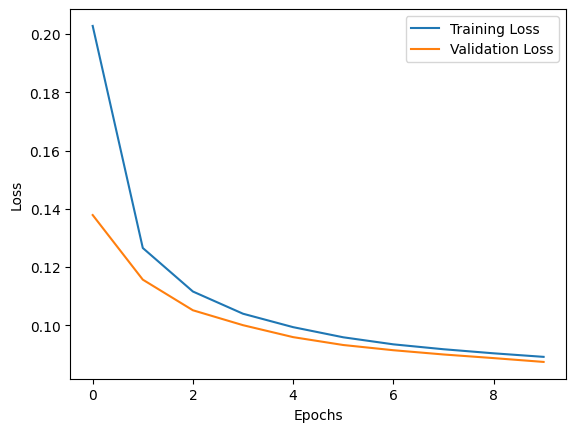

In [4]:

# Autoencoder model
autoencoder = tf.keras.Model(inputs=encoder_inputs, outputs=decoder_outputs)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


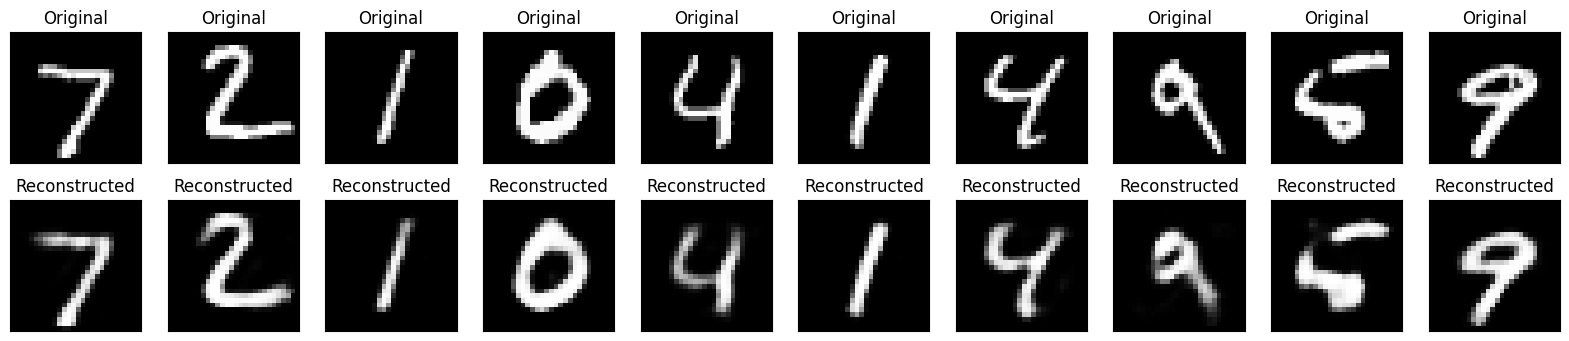

In [5]:

# Test the autoencoder
decoded_images = autoencoder.predict(x_test)

# Plot some original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.title('Reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()